# Convolution layer

In [1]:
import math
import numpy as np
import keras.activations as activation

Using TensorFlow backend.


In [4]:
input=np.random.rand(28,28,1)
kernal_shape=(3,3)
stride=1
x=zero_pad(input,kernal_shape,stride)

In [ ]:
# x[:,:,0]

In [3]:
def zero_pad(input,kernel_shape,stride):
    pad = math.floor(kernel_shape[0]/2)
    img_pad=np.zeros((input.shape[0]+2*pad,input.shape[1]+2*pad,input.shape[2]))#channel first
    W = input.shape[0]
    H = input.shape[1]
    for i in range(input.shape[2]):
        img_pad[pad:H+pad,pad:W+pad,i]=input[:,:,i]
    return img_pad

In [5]:
def convolution(number_kernals,kernal,input,bias,pad):
    output=np.zeros((input.shape[0],input.shape[1],number_kernals))
    stride=1
    if(pad==1):
        padded_input=zero_pad(input,kernal.shape,stride)
    else:
        padded_input=input
        output=np.zeros((input.shape[0]-2,input.shape[1]-2,number_kernals))
    kernal_number=0

    for k in range(number_kernals):
        ker=kernal[:,:,:,k].reshape(kernal.shape[0],kernal.shape[1],kernal.shape[2])
        i=0
        #print("ker:",ker)
        while(i<padded_input.shape[0]):
            j=0
            while(j<padded_input.shape[1]):
                if(i+ker.shape[0]<=padded_input.shape[0] and j+ker.shape[1]<=padded_input.shape[1]):
                    weighted_sum=np.sum(padded_input[i:i+ker.shape[0],j:j+ker.shape[1],:]*ker)+bias[k]
                    output[i][j][kernal_number]=max(0,weighted_sum)
                else:
                    break
                j=j+1
            i=i+1
            #print("out",i)
        kernal_number=kernal_number+1

    return output


In [6]:
# Assumming image is square shaped
def max_pooling2d(input,pool_shape,pad):
    stride=pool_shape[0]
    rem=0
    img_pad=input.copy()
    pad_input=input
    if((img_pad.shape[0]%pool_shape[0])!=0):
        rem = (pool_shape[0]-(img_pad.shape[0]%pool_shape[0]))
        pad_input = np.zeros((img_pad.shape[0]+rem,img_pad.shape[1]+rem,input.shape[2]))
    for i in range(img_pad.shape[2]):
        pad_input[0:img_pad.shape[0],0:img_pad.shape[1],i]= img_pad[:,:,i]
    print(pad_input.shape)
        
    img_out=np.zeros((int(pad_input.shape[0]/2),int(pad_input.shape[1]/2),input.shape[2]))
    width=0
    height=0
    for depth in range(pad_input.shape[2]):
        i=0
        height=0
        while(i<=pad_input.shape[0]-pool_shape[0]):
            j=0
            width=0
            while(j<=pad_input.shape[1]-pool_shape[1]):
                img_out[height][width][depth]=np.amax(pad_input[i:i+pool_shape[0],j:j+pool_shape[1],depth])
                width=width+1
                j=j+stride
            i=i+stride
            height=height+1
#     print(output.shape)
    return img_out        

In [7]:
input=np.random.rand(28,28,2)

x=max_pooling2d(input,(2,2),1)
x.shape

(28, 28, 2)


(14, 14, 2)

In [8]:
# print(input[:,:,0])
# print(x[:,:,0])

In [9]:
def upsampling(input):
    img_up=np.zeros((input.shape[0]*2,input.shape[1]*2,input.shape[2]))
    for k in range(input.shape[2]):
        i=0
        i1=0
        while(i<img_up.shape[0]):
            j=0
            j1=0
            while(j<img_up.shape[1]):
                if(i<img_up.shape[0]-1 and j<img_up.shape[1]-1):
                    
                    img_up[i:i+1+1,j:j+1+1,k]=input[i1][j1][k]
                j1=j1+1
                j=j+2
            i=i+2
            i1=i1+1
    return img_up

In [10]:
# input=np.random.rand(2,2,2)
# x=upsampling(input)

In [11]:
#print(input[:,:,1])
# print(x[:,:,1])

In [12]:
import pickle
file=open('model_files/learnable_weights.pkl','rb')#kernal weights from keras model
kernals_list=pickle.load(file)


FileNotFoundError: [Errno 2] No such file or directory: 'model_files/learnable_weights.pkl'

In [ ]:
kernal_l=[]
bias_l=[]
for i in range(len(kernals_list)):
    if(i%2==0):
#         print(kernals_list[i].shape)
        kernal_l.append(kernals_list[i])
    else:
#         print(kernals_list[i].shape)
        bias_l.append(kernals_list[i])

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [ ]:
input_img=x_train[0]

In [ ]:
    decoded_list=[]
    layer1=convolution(16,kernal_l[0],input_img,bias_l[0],pad=1)
    layer2=max_pooling2d(layer1,(2,2),0)
    layer3=convolution(8,kernal_l[1],layer2,bias_l[1],pad=1)
    layer4=max_pooling2d(layer3,(2,2),0)
    layer5=convolution(8,kernal_l[2],layer4,bias_l[2],pad=1)
    encoded=max_pooling2d(layer5,(2,2),1)
    layer7=convolution(8,kernal_l[3],encoded,bias_l[3],pad=1)
    layer8=upsampling(layer7)
    layer9=convolution(8,kernal_l[4],layer8,bias_l[4],pad=1)
    layer10=upsampling(layer9)
    layer11=convolution(16,kernal_l[5],layer10,bias_l[5],pad=0)
    layer12=upsampling(layer11)
    decoded=convolution(1,kernal_l[6],layer12,bias_l[6],pad=1)
    decoded_list.append(decoded)

# keras models

In [ ]:
decoded.shape

In [ ]:
import pickle
from keras import backend as K
image=np.zeros((1,28,28,1))
for i in range(28):
    for j in range(28):
        image[0][i][j][0]=x_train[2][i][j][0]
    
file=open('model_files/autoencoder.pkl','rb')#autoencoder model
model=pickle.load(file)
get_1st_layer_output = K.function([model.layers[0].input],
                                  [model.layers[1].output])
layer_output1=get_1st_layer_output([image])[0]


In [ ]:
get_2nd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[2].output])
layer_output2=get_2nd_layer_output([image])[0]

In [ ]:
get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[3].output])
layer_output3=get_3rd_layer_output([image])[0]

In [ ]:
get_4th_layer_output = K.function([model.layers[0].input],
                                  [model.layers[4].output])
layer_output4=get_4th_layer_output([image])[0]

In [ ]:
get_5th_layer_output = K.function([model.layers[0].input],
                                  [model.layers[5].output])
layer_output5=get_5th_layer_output([image])[0]

In [ ]:
get_6th_layer_output = K.function([model.layers[0].input],
                                  [model.layers[6].output])
layer_output6=get_6th_layer_output([image])[0]

In [ ]:
get_7th_layer_output = K.function([model.layers[0].input],
                                  [model.layers[7].output])
layer_output7=get_7th_layer_output([image])[0]

In [ ]:
get_8th_layer_output = K.function([model.layers[0].input],
                                  [model.layers[8].output])
layer_output8=get_8th_layer_output([image])[0]
get_9th_layer_output = K.function([model.layers[0].input],
                                  [model.layers[9].output])
layer_output9=get_9th_layer_output([image])[0]
get_10th_layer_output = K.function([model.layers[0].input],
                                  [model.layers[10].output])
layer_output10=get_10th_layer_output([image])[0]
get_11th_layer_output = K.function([model.layers[0].input],
                                  [model.layers[11].output])
layer_output11=get_11th_layer_output([image])[0]
get_12th_layer_output = K.function([model.layers[0].input],
                                  [model.layers[12].output])
layer_output12=get_12th_layer_output([image])[0]
get_13th_layer_output = K.function([model.layers[0].input],
                                  [model.layers[13].output])
layer_output13=get_13th_layer_output([image])[0]
diff13=layer_output13[0]-decoded#conv
sum13=np.sum(diff13)
print(sum13)

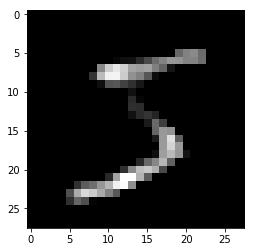

In [164]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
#plt.imshow(x_train[].reshape(28, 28))

#plt.gray()
plt.imshow(decoded.reshape(28, 28))
plt.gray()


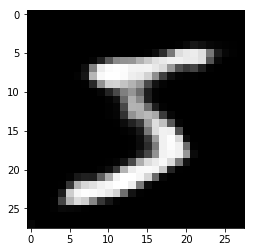

In [167]:
plt.figure(figsize=(20, 4))
img=np.zeros((1,28,28,1))
for i in range(28):
    for j in range(28):
        img[0][i][j][0]=input_img[i][j]
plt.imshow(model.predict(img).reshape(28, 28))